In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

Read the dataset

In [2]:
users = pd.read_csv("users.csv")
users = users.drop(columns = "Unnamed: 0")
users

,id,created_at,class,coordinates
0,37e369a8-4477-4d5d-acd7-4e3b8059586e,2021-03-23 00:24:53,Creator,"('36.76775', '2.95924')"
1,27cf0bb6-3488-4662-916d-3ad04eeec9ca,2021-04-09 19:55:07,Viewer,"('43.71032', '-1.05366')"
2,5ebd5e12-ba2a-4bf9-b7e4-92ad24711cd4,2021-04-08 21:48:45,Super Gamer,"('51.26', '-2.1875')"
3,30986592-0cbf-43bb-83ed-7501ab3bd373,2021-05-15 00:45:51,Creator,"('40.65538', '-74.38987')"
4,25b49125-34d1-4694-a4a9-8415bcc3567b,2021-07-05 04:08:53,Viewer,"('35.61452', '-88.81395')"
...,...,...,...,...
995,d91c5e9a-ed7e-4f4a-b62b-ddabe069198a,2021-11-15 15:16:47,Viewer,"('-23.44361', '-51.87389')"
996,b80a25b8-a567-449c-af7a-420c46254112,2021-03-26 22:23:00,Creator,"('54.48147', '53.47103')"
997,3d27e9ff-bc73-47f7-a51d-3047e6ec959f,2021-08-28 20:45:04,Super Gamer,"('18.87813', '72.93924')"
998,84e57e9b-4e2e-408b-a351-2aedf85a207c,2021-04-15 10:35:55,Viewer,"('31.92923', '34.86563')"


In [3]:
videos = pd.read_csv("videos.csv")
videos = videos.drop(columns = "Unnamed: 0")
videos

,id,attribute_id,music_id,animation_id,duration,creator,created_at,num_shares,game_id,is_ar
0,6e884071-8c0e-4782-aa40-e0fd78243360,4712e9e6-bef1-4646-b21e-ca5336901bf9,4ee0de5b-e27f-4d73-a3c6-52cf26e36c54,17dab81c-6180-4a4b-b539-91978a726cfd,5.34,73ec1ac2-d148-45ac-94a8-9bdff51730d7,2021-08-04 10:42:39,12,8bd4c7be-fe87-45ad-990d-d131cd3d9c77,True
1,ac90ff16-24b4-46bc-ae72-2da847f9e6c9,4f91d2b6-bf42-4d3f-a8e8-acc3b07f647e,4ee0de5b-e27f-4d73-a3c6-52cf26e36c54,6d7a0545-0bca-4bf4-a306-931e57d8ffe2,3.88,0230f9af-e89f-4886-8322-52a38eaf991c,2021-11-27 10:06:43,3,6ca0f645-a16b-42b0-9dc2-2ae952c83591,True
2,fb5eaf0d-e72c-4523-b5c5-4d9c323cef5f,80f5b187-f6e6-40f2-9b6e-fe62b67049a8,d53234f4-1efb-4299-97c1-11658118cba5,716c02df-bd3a-41c9-b2be-86fb74ff3255,5.15,fbf93fbf-a935-436f-8516-8acb863e779f,2021-02-26 04:18:53,4,6ca0f645-a16b-42b0-9dc2-2ae952c83591,True
3,bbf89dcb-7fbd-439d-9a7d-36ef7a1c2aa3,02b2b662-1b39-4d91-9417-dddc9451d8e1,19e4db13-d854-4913-a8ca-3612ee1a6071,b7bd5204-2976-4eb0-ab71-508a848bc325,6.50,f7a2adb8-44d7-4408-a2a9-3a593fc6d626,2021-11-27 02:08:02,9,8bd4c7be-fe87-45ad-990d-d131cd3d9c77,False
4,4c613ec6-fa6f-47e8-b4ab-658e2f6a644d,06c496ee-e884-42f9-ba39-010a66ed5296,b5b679a5-e769-4d95-82a6-f75e439b1ef9,17dab81c-6180-4a4b-b539-91978a726cfd,4.38,d9f9538f-1b7e-4f35-805d-924b309d75d8,2021-11-17 11:06:32,14,2609b6b5-3a08-451e-bce5-75fe506559d2,False
...,...,...,...,...,...,...,...,...,...,...
4995,f6fec2d4-77d6-46ea-b41c-d97154bd5238,e339ba35-ffef-403b-a17c-dd218fdbb915,19e4db13-d854-4913-a8ca-3612ee1a6071,ff1a548b-e307-474c-a405-6370ca1a0639,3.82,4db64146-3864-40d1-9908-faa3f4a04a80,2021-11-08 04:21:06,2,6ca0f645-a16b-42b0-9dc2-2ae952c83591,False
4996,f90ef4f1-b5ab-431e-9fc8-cf7359138168,06c496ee-e884-42f9-ba39-010a66ed5296,8ff50feb-3b5d-4dd0-84b0-8409753bd166,08dda558-a151-45a2-8e43-1ba6f2891800,5.64,4bcc7557-3760-49e3-895a-f122d9d112f1,2021-09-11 23:29:23,18,66653b7c-b600-49b3-a58c-d1862e91d426,False
4997,ad00eac6-19d5-48f9-bed7-066b77546191,4f91d2b6-bf42-4d3f-a8e8-acc3b07f647e,e2bf5d12-edc2-47cb-b23f-1f4f7c1a2292,ff1a548b-e307-474c-a405-6370ca1a0639,4.72,0ef242cf-8c59-45d7-acfc-dadce146c907,2021-11-22 16:46:18,4,66653b7c-b600-49b3-a58c-d1862e91d426,False
4998,1100779d-e85f-4836-a154-3b4d543f910c,25e7fab9-abfb-4a74-a8cb-c3adbc6e3531,da2fc9b0-32d5-4a1b-8b40-2706eb133bf0,ace4c5e2-ef86-429a-aad3-23bef7a1c9f1,6.44,9b8274ec-0e8f-47fb-8b16-07e1ec115798,2021-07-09 18:02:48,8,2609b6b5-3a08-451e-bce5-75fe506559d2,False


In [4]:
feeds = pd.read_csv("feeds.csv")
feeds = feeds.drop(columns = "Unnamed: 0")
feeds

,id,name
0,27a87df4-da75-451f-b8f6-af9dd0a4ee00,music
1,42568c8a-efbe-4293-81a3-513e33094ade,fashion
2,6894af29-56cc-4b4a-8ee6-be9b3cb3e7f1,sports
3,c9d59470-c4ee-43ff-831d-b52508c8d848,games
4,582520b2-b30a-4ecb-b1b4-1806672fcfc4,travel
5,a8a04865-55d4-4de4-8141-b273b678299f,fun
6,644a3cb6-e266-4757-9e96-a3ee049216fe,jokes
7,da6c201f-8e50-433c-b2ad-614e42fac047,love
8,8078efe7-5bae-4528-9a66-b85904cc73ac,dance
9,30134b9e-1b79-43fb-b0c5-373af9237b2c,beaches


In [5]:
watched = pd.read_csv("watchedVideo.csv")
watched = watched.drop(columns = "Unnamed: 0")
watched

,coordinates,os,duration,videoId,userId,appVersion,dateTime,feedId
0,"(Decimal('14.439490'), Decimal('105.291233'))",iOS,3.95,722e110c-2f81-46aa-9c25-4d26fd77519f,317a2bc3-5f95-4d35-9a94-1f2f38424c4f,2.2.2,2021-08-04 09:39:07,30134b9e-1b79-43fb-b0c5-373af9237b2c
1,"(Decimal('40.866935'), Decimal('-73.845013'))",iOS,5.95,cc10d153-37f9-42b5-8d78-2365908acf2b,db031c3d-69e4-4c06-91fe-e9be0a3c173c,2.2.1,2021-07-06 16:32:10,8078efe7-5bae-4528-9a66-b85904cc73ac
2,"(Decimal('48.666850'), Decimal('9.359456'))",iOS,0.69,7f3f7fce-f2ec-4dfd-bac8-92dc7865a365,8fb18b66-f548-42a7-b394-c1be963cac29,2.2.0,2021-12-06 01:42:02,6894af29-56cc-4b4a-8ee6-be9b3cb3e7f1
3,"(Decimal('5.172365'), Decimal('-74.439009'))",Android,2.81,8ffc47e3-32ce-4d24-a990-9baac556603b,960fb90e-eddc-478a-a64a-04b9dded3a05,2.1.2,2021-12-04 21:02:50,42568c8a-efbe-4293-81a3-513e33094ade
4,"(Decimal('4.063707'), Decimal('9.606159'))",iOS,5.88,47e70477-7511-4bd0-801b-1651f951002f,1ce0c003-25e7-473f-8796-0fe04d6c275c,2.1.2,2021-11-28 16:12:39,582520b2-b30a-4ecb-b1b4-1806672fcfc4
...,...,...,...,...,...,...,...,...
49995,"(Decimal('26.318764'), Decimal('68.257897'))",iOS,3.06,bfd82a3f-48ce-4fa2-9ac3-02f422936017,0230f9af-e89f-4886-8322-52a38eaf991c,2.2.4,2021-10-13 04:58:05,42568c8a-efbe-4293-81a3-513e33094ade
49996,"(Decimal('8.891013'), Decimal('-13.246846'))",iOS,1.01,e4c54724-4b9b-4924-bd46-d1bcdf0a77d0,c240b902-021a-4c1b-885d-11e3b829f0e7,2.2.2,2021-10-17 04:29:19,6894af29-56cc-4b4a-8ee6-be9b3cb3e7f1
49997,"(Decimal('13.362063'), Decimal('78.721593'))",iOS,5.66,396b12f5-b33e-436b-a59d-794b3c37662d,4ce5c56a-faa7-4cb5-bcff-38a4290fc688,2.2.4,2021-12-06 18:20:18,30134b9e-1b79-43fb-b0c5-373af9237b2c
49998,"(Decimal('35.573808'), Decimal('-91.401677'))",iOS,0.63,f71851b1-cfb8-4459-aedc-d14c3e01d7ca,0ad99cde-6ca2-475e-88b8-ad81281c05ac,3.0.0,2021-11-23 10:05:22,30134b9e-1b79-43fb-b0c5-373af9237b2c


In [6]:
users["class"].value_counts()

Gamer            213
Super Gamer      209
Super Creator    206
Creator          186
Viewer           186
Name: class, dtype: int64

Users' category has similar distribution between gamer, super gamer, super creator, creator and viewer. 

In [7]:
videos_is_ar = videos.groupby("is_ar").sum()
videos_is_ar['count videos'] = videos.groupby("is_ar").count()['id']
videos_is_ar

,duration,num_shares,count videos
is_ar,,,
False,11184.18,24338,2472
True,11498.36,24906,2528


There are more videos being created using AR, and it leads to longer duration and higher number of sharing. 

In [8]:
videos_dur_shares = videos[['duration', 'num_shares']].groupby('duration').sum().reset_index()
videos_dur_shares["duration"] = pd.cut(videos_dur_shares.duration, bins = [2,3,4,5,6,7])
videos_dur_shares = videos_dur_shares.groupby("duration").sum().reset_index()
#plt.plot(videos_dur_shares['duration'], videos_dur_shares['num_shares'])
videos_dur_shares

,duration,num_shares
0,"(2, 3]",8759
1,"(3, 4]",10010
2,"(4, 5]",10311
3,"(5, 6]",10476
4,"(6, 7]",9688


The duration of the videos that would result on higher number of sharing is between 5 to 6 minutes. Thus, it is recommended to not create a video with too short or too long duration. 

<BarContainer object of 5 artists>

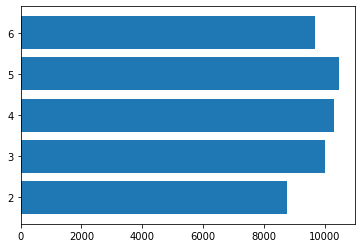

In [9]:
plt.barh(np.arange(2,7), videos_dur_shares['num_shares'])

In [10]:
users_watched = users.merge(watched, left_on = "id", right_on = "userId")
users_watched = users_watched[['id', 'class', 'os','duration', 'feedId']]
users_watched

,id,class,os,duration,feedId
0,37e369a8-4477-4d5d-acd7-4e3b8059586e,Creator,iOS,0.26,582520b2-b30a-4ecb-b1b4-1806672fcfc4
1,37e369a8-4477-4d5d-acd7-4e3b8059586e,Creator,iOS,1.38,644a3cb6-e266-4757-9e96-a3ee049216fe
2,37e369a8-4477-4d5d-acd7-4e3b8059586e,Creator,Android,3.79,a8a04865-55d4-4de4-8141-b273b678299f
3,37e369a8-4477-4d5d-acd7-4e3b8059586e,Creator,iOS,1.58,c9d59470-c4ee-43ff-831d-b52508c8d848
4,37e369a8-4477-4d5d-acd7-4e3b8059586e,Creator,iOS,4.31,c9d59470-c4ee-43ff-831d-b52508c8d848
...,...,...,...,...,...
49995,471e1687-07ba-4bb6-8341-839bd3d7c851,Viewer,Android,6.38,30134b9e-1b79-43fb-b0c5-373af9237b2c
49996,471e1687-07ba-4bb6-8341-839bd3d7c851,Viewer,Android,1.55,6894af29-56cc-4b4a-8ee6-be9b3cb3e7f1
49997,471e1687-07ba-4bb6-8341-839bd3d7c851,Viewer,Android,0.61,30134b9e-1b79-43fb-b0c5-373af9237b2c
49998,471e1687-07ba-4bb6-8341-839bd3d7c851,Viewer,iOS,3.15,6894af29-56cc-4b4a-8ee6-be9b3cb3e7f1


In [11]:
users_class = users_watched.groupby("class").count()
users_class['duration'] = users_watched.groupby("class").sum()
users_class = users_class.drop(columns = ['os', 'feedId'])
users_class = users_class.reset_index()
users_class

,class,id,duration
0,Creator,9216,31296.10
1,Gamer,10685,36642.69
2,Super Creator,10245,34844.78
3,Super Gamer,10567,36171.18
4,Viewer,9287,31556.74


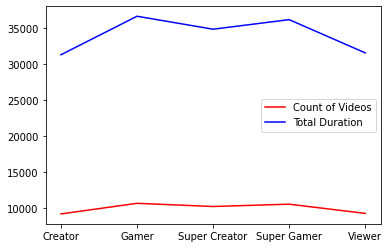

In [12]:
fig,ax = plt.subplots()
plt.plot(users_class["class"], users_class['id'], color = "red", label = "Count of Videos")
plt.plot(users_class["class"], users_class['duration'], color = "blue", label = 'Total Duration')
leg = plt.legend(loc='best')
plt.show()

Gamer watched the most number of videos and so also spent the longest duration. 

In [13]:
users_os = users_watched.groupby("os").sum()
users_os['count'] = users_watched.groupby("os").count()[['id']]
users_os = users_os.reset_index()
users_os

,os,duration,count
0,Android,85247.97,25037
1,iOS,85263.52,24963


The distribution of the watcher using Android and iOS are pretty similar from both the number of videos seen and the duration. 

In [14]:
users_feeds = users_watched.merge(feeds, left_on = "feedId", right_on = "id")
users_feeds = users_feeds.drop(columns = ["feedId", "id_y"]).rename(columns = {"id_x": "id"})
users_feeds

,id,class,os,duration,name
0,37e369a8-4477-4d5d-acd7-4e3b8059586e,Creator,iOS,0.26,travel
1,37e369a8-4477-4d5d-acd7-4e3b8059586e,Creator,Android,6.02,travel
2,37e369a8-4477-4d5d-acd7-4e3b8059586e,Creator,iOS,2.07,travel
3,37e369a8-4477-4d5d-acd7-4e3b8059586e,Creator,Android,4.22,travel
4,37e369a8-4477-4d5d-acd7-4e3b8059586e,Creator,iOS,4.23,travel
...,...,...,...,...,...
49995,84e57e9b-4e2e-408b-a351-2aedf85a207c,Viewer,Android,2.32,love
49996,84e57e9b-4e2e-408b-a351-2aedf85a207c,Viewer,iOS,2.27,love
49997,471e1687-07ba-4bb6-8341-839bd3d7c851,Viewer,iOS,3.94,love
49998,471e1687-07ba-4bb6-8341-839bd3d7c851,Viewer,iOS,0.57,love


In [15]:
users_feeds_name = users_feeds.groupby("name").count()[["id"]]
users_feeds_name['duration'] = users_feeds.groupby("name").sum()
users_feeds_name = users_feeds_name.reset_index()
users_feeds_name

,name,id,duration
0,beaches,4895,16678.14
1,dance,5012,16989.67
2,fashion,5116,17573.16
3,fun,4974,17225.11
4,games,4989,17046.31
5,jokes,4976,16866.38
6,love,4939,16923.41
7,music,4978,17083.13
8,sports,5017,16815.89
9,travel,5104,17310.29


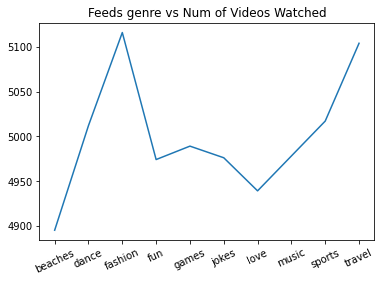

In [16]:
plt.plot(users_feeds_name['name'], users_feeds_name['id'])
plt.xticks(rotation = 25) 
plt.title("Feeds genre vs Num of Videos Watched")
plt.show()

The interesting part is that the most popular genre from the videos posted is fashion and travel, but the most watchers come from gamer, which logically would like to see gaming contents. 

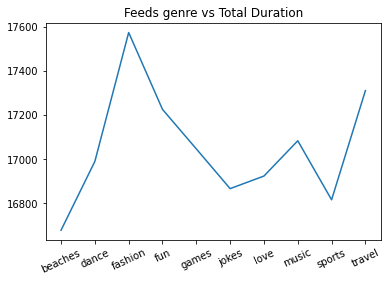

In [17]:
plt.plot(users_feeds_name['name'], users_feeds_name['duration'])
plt.xticks(rotation = 25) 
plt.title("Feeds genre vs Total Duration")
plt.show()

Even though travel is one of the most popular genre, the duration of people watching the videos is similar to fun genre which has lower number of videos being watched. This means that we need to review the quality content of travel genre. On the other hand, once people watched fun videos, they seem to enjoy it resulted on longer duration of watching. 

In [18]:
def get_year(ser):
  return watched[ser].str.split("-")[0]

def get_month(ser):
  return ser.str.split("-")[1]

In [19]:
year = []
month = []
for x in watched['dateTime']:
  year.append(x.split("-")[0])
  month.append(x.split("-")[1])
watched['year'] = year
watched['month'] = month
watched

,coordinates,os,duration,videoId,userId,appVersion,dateTime,feedId,year,month
0,"(Decimal('14.439490'), Decimal('105.291233'))",iOS,3.95,722e110c-2f81-46aa-9c25-4d26fd77519f,317a2bc3-5f95-4d35-9a94-1f2f38424c4f,2.2.2,2021-08-04 09:39:07,30134b9e-1b79-43fb-b0c5-373af9237b2c,2021,08
1,"(Decimal('40.866935'), Decimal('-73.845013'))",iOS,5.95,cc10d153-37f9-42b5-8d78-2365908acf2b,db031c3d-69e4-4c06-91fe-e9be0a3c173c,2.2.1,2021-07-06 16:32:10,8078efe7-5bae-4528-9a66-b85904cc73ac,2021,07
2,"(Decimal('48.666850'), Decimal('9.359456'))",iOS,0.69,7f3f7fce-f2ec-4dfd-bac8-92dc7865a365,8fb18b66-f548-42a7-b394-c1be963cac29,2.2.0,2021-12-06 01:42:02,6894af29-56cc-4b4a-8ee6-be9b3cb3e7f1,2021,12
3,"(Decimal('5.172365'), Decimal('-74.439009'))",Android,2.81,8ffc47e3-32ce-4d24-a990-9baac556603b,960fb90e-eddc-478a-a64a-04b9dded3a05,2.1.2,2021-12-04 21:02:50,42568c8a-efbe-4293-81a3-513e33094ade,2021,12
4,"(Decimal('4.063707'), Decimal('9.606159'))",iOS,5.88,47e70477-7511-4bd0-801b-1651f951002f,1ce0c003-25e7-473f-8796-0fe04d6c275c,2.1.2,2021-11-28 16:12:39,582520b2-b30a-4ecb-b1b4-1806672fcfc4,2021,11
...,...,...,...,...,...,...,...,...,...,...
49995,"(Decimal('26.318764'), Decimal('68.257897'))",iOS,3.06,bfd82a3f-48ce-4fa2-9ac3-02f422936017,0230f9af-e89f-4886-8322-52a38eaf991c,2.2.4,2021-10-13 04:58:05,42568c8a-efbe-4293-81a3-513e33094ade,2021,10
49996,"(Decimal('8.891013'), Decimal('-13.246846'))",iOS,1.01,e4c54724-4b9b-4924-bd46-d1bcdf0a77d0,c240b902-021a-4c1b-885d-11e3b829f0e7,2.2.2,2021-10-17 04:29:19,6894af29-56cc-4b4a-8ee6-be9b3cb3e7f1,2021,10
49997,"(Decimal('13.362063'), Decimal('78.721593'))",iOS,5.66,396b12f5-b33e-436b-a59d-794b3c37662d,4ce5c56a-faa7-4cb5-bcff-38a4290fc688,2.2.4,2021-12-06 18:20:18,30134b9e-1b79-43fb-b0c5-373af9237b2c,2021,12
49998,"(Decimal('35.573808'), Decimal('-91.401677'))",iOS,0.63,f71851b1-cfb8-4459-aedc-d14c3e01d7ca,0ad99cde-6ca2-475e-88b8-ad81281c05ac,3.0.0,2021-11-23 10:05:22,30134b9e-1b79-43fb-b0c5-373af9237b2c,2021,11


In [20]:
watched_dt = watched.groupby(by = ["month", "year"]).count()[['userId']]
watched_dt['duration'] = watched.groupby(by = ["month", "year"]).sum()
watched_dt

,,userId,duration
month,year,,
01,2021,1,4.07
02,2021,8,25.44
03,2021,25,78.29
04,2021,80,271.10
05,2021,213,769.84
06,2021,385,1323.49
07,2021,817,2838.95
08,2021,1696,5934.14
09,2021,3122,10638.86


The number of videos being watched increased rapidly throughout the year. 

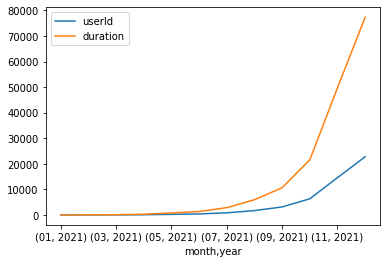

In [21]:
watched_dt.plot()

In [22]:
watched_videos = watched.merge(videos, left_on = "videoId", right_on = "id")
watched_videos = watched_videos.drop(columns = ['coordinates', 'os', 'duration_y', 'appVersion', 'dateTime', 'attribute_id', 'music_id', 'animation_id', 'creator', 'game_id']).rename(columns = {'duration_x': 'duration'})
watched_videos

,duration,videoId,userId,feedId,year,month,id,created_at,num_shares,is_ar
0,3.95,722e110c-2f81-46aa-9c25-4d26fd77519f,317a2bc3-5f95-4d35-9a94-1f2f38424c4f,30134b9e-1b79-43fb-b0c5-373af9237b2c,2021,08,722e110c-2f81-46aa-9c25-4d26fd77519f,2021-07-23 22:53:22,16,False
1,3.95,722e110c-2f81-46aa-9c25-4d26fd77519f,98c7b0e1-b23c-450e-a023-1cf7c274603c,8078efe7-5bae-4528-9a66-b85904cc73ac,2021,09,722e110c-2f81-46aa-9c25-4d26fd77519f,2021-07-23 22:53:22,16,False
2,3.95,722e110c-2f81-46aa-9c25-4d26fd77519f,1a1a700f-a044-406f-82b8-c9e4274c1e16,42568c8a-efbe-4293-81a3-513e33094ade,2021,12,722e110c-2f81-46aa-9c25-4d26fd77519f,2021-07-23 22:53:22,16,False
3,1.80,722e110c-2f81-46aa-9c25-4d26fd77519f,8f11d2ed-f3c3-4cd7-82bc-a010bd5c5dbc,c9d59470-c4ee-43ff-831d-b52508c8d848,2021,11,722e110c-2f81-46aa-9c25-4d26fd77519f,2021-07-23 22:53:22,16,False
4,3.95,722e110c-2f81-46aa-9c25-4d26fd77519f,77224f7c-7e72-47ab-9b65-f809c872efcf,42568c8a-efbe-4293-81a3-513e33094ade,2021,11,722e110c-2f81-46aa-9c25-4d26fd77519f,2021-07-23 22:53:22,16,False
...,...,...,...,...,...,...,...,...,...,...
49995,0.74,7f9c4c4e-a0d0-4882-a520-caed34675f9c,b87898bb-a914-440d-8f6f-581fed1b4acc,a8a04865-55d4-4de4-8141-b273b678299f,2021,11,7f9c4c4e-a0d0-4882-a520-caed34675f9c,2021-11-20 05:17:09,2,True
49996,2.67,cb723709-d514-4026-b947-8ba9c8e40184,43240bfa-c9fd-492c-8633-cc6eac290443,da6c201f-8e50-433c-b2ad-614e42fac047,2021,11,cb723709-d514-4026-b947-8ba9c8e40184,2021-11-02 03:20:50,7,True
49997,1.09,cb723709-d514-4026-b947-8ba9c8e40184,1bd62d4f-ce05-48d7-900c-3af3078fc39e,8078efe7-5bae-4528-9a66-b85904cc73ac,2021,11,cb723709-d514-4026-b947-8ba9c8e40184,2021-11-02 03:20:50,7,True
49998,2.67,cb723709-d514-4026-b947-8ba9c8e40184,026ee0da-c0e9-4b8b-bda9-33531096ea10,6894af29-56cc-4b4a-8ee6-be9b3cb3e7f1,2021,11,cb723709-d514-4026-b947-8ba9c8e40184,2021-11-02 03:20:50,7,True


In [23]:
year_created = []
month_created = []
for x in videos['created_at']:
  year_created.append(x.split("-")[0])
  month_created.append(x.split("-")[1])
videos['year created'] = year_created
videos['month created'] = month_created
videos

,id,attribute_id,music_id,animation_id,duration,creator,created_at,num_shares,game_id,is_ar,year created,month created
0,6e884071-8c0e-4782-aa40-e0fd78243360,4712e9e6-bef1-4646-b21e-ca5336901bf9,4ee0de5b-e27f-4d73-a3c6-52cf26e36c54,17dab81c-6180-4a4b-b539-91978a726cfd,5.34,73ec1ac2-d148-45ac-94a8-9bdff51730d7,2021-08-04 10:42:39,12,8bd4c7be-fe87-45ad-990d-d131cd3d9c77,True,2021,08
1,ac90ff16-24b4-46bc-ae72-2da847f9e6c9,4f91d2b6-bf42-4d3f-a8e8-acc3b07f647e,4ee0de5b-e27f-4d73-a3c6-52cf26e36c54,6d7a0545-0bca-4bf4-a306-931e57d8ffe2,3.88,0230f9af-e89f-4886-8322-52a38eaf991c,2021-11-27 10:06:43,3,6ca0f645-a16b-42b0-9dc2-2ae952c83591,True,2021,11
2,fb5eaf0d-e72c-4523-b5c5-4d9c323cef5f,80f5b187-f6e6-40f2-9b6e-fe62b67049a8,d53234f4-1efb-4299-97c1-11658118cba5,716c02df-bd3a-41c9-b2be-86fb74ff3255,5.15,fbf93fbf-a935-436f-8516-8acb863e779f,2021-02-26 04:18:53,4,6ca0f645-a16b-42b0-9dc2-2ae952c83591,True,2021,02
3,bbf89dcb-7fbd-439d-9a7d-36ef7a1c2aa3,02b2b662-1b39-4d91-9417-dddc9451d8e1,19e4db13-d854-4913-a8ca-3612ee1a6071,b7bd5204-2976-4eb0-ab71-508a848bc325,6.50,f7a2adb8-44d7-4408-a2a9-3a593fc6d626,2021-11-27 02:08:02,9,8bd4c7be-fe87-45ad-990d-d131cd3d9c77,False,2021,11
4,4c613ec6-fa6f-47e8-b4ab-658e2f6a644d,06c496ee-e884-42f9-ba39-010a66ed5296,b5b679a5-e769-4d95-82a6-f75e439b1ef9,17dab81c-6180-4a4b-b539-91978a726cfd,4.38,d9f9538f-1b7e-4f35-805d-924b309d75d8,2021-11-17 11:06:32,14,2609b6b5-3a08-451e-bce5-75fe506559d2,False,2021,11
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,f6fec2d4-77d6-46ea-b41c-d97154bd5238,e339ba35-ffef-403b-a17c-dd218fdbb915,19e4db13-d854-4913-a8ca-3612ee1a6071,ff1a548b-e307-474c-a405-6370ca1a0639,3.82,4db64146-3864-40d1-9908-faa3f4a04a80,2021-11-08 04:21:06,2,6ca0f645-a16b-42b0-9dc2-2ae952c83591,False,2021,11
4996,f90ef4f1-b5ab-431e-9fc8-cf7359138168,06c496ee-e884-42f9-ba39-010a66ed5296,8ff50feb-3b5d-4dd0-84b0-8409753bd166,08dda558-a151-45a2-8e43-1ba6f2891800,5.64,4bcc7557-3760-49e3-895a-f122d9d112f1,2021-09-11 23:29:23,18,66653b7c-b600-49b3-a58c-d1862e91d426,False,2021,09
4997,ad00eac6-19d5-48f9-bed7-066b77546191,4f91d2b6-bf42-4d3f-a8e8-acc3b07f647e,e2bf5d12-edc2-47cb-b23f-1f4f7c1a2292,ff1a548b-e307-474c-a405-6370ca1a0639,4.72,0ef242cf-8c59-45d7-acfc-dadce146c907,2021-11-22 16:46:18,4,66653b7c-b600-49b3-a58c-d1862e91d426,False,2021,11
4998,1100779d-e85f-4836-a154-3b4d543f910c,25e7fab9-abfb-4a74-a8cb-c3adbc6e3531,da2fc9b0-32d5-4a1b-8b40-2706eb133bf0,ace4c5e2-ef86-429a-aad3-23bef7a1c9f1,6.44,9b8274ec-0e8f-47fb-8b16-07e1ec115798,2021-07-09 18:02:48,8,2609b6b5-3a08-451e-bce5-75fe506559d2,False,2021,07


In [24]:
watch_group = watched_videos.groupby(['year', 'month']).count()[["id"]].reset_index()
created_group = videos[['id', 'year created', 'month created']].groupby(['year created', 'month created']).count().reset_index()
watch_group['date'] = watch_group['year'] + "-" + watch_group['month']
created_group['date'] = created_group['year created'] + "-" + created_group['month created']
merged_group = created_group.merge(watch_group, how = "outer", on = "date")
merged_group = merged_group.drop(columns = ['year created', 'month created', 'year', 'month'])
merged_group = merged_group.rename(columns = {"id_y": "Num Videos Watched", "id_x": "Num Videos Created"})
merged_group = merged_group.set_index("date")
merged_group = merged_group.reset_index()
merged_group

,date,Num Videos Created,Num Videos Watched
0,2021-01,16,1
1,2021-02,45,8
2,2021-03,109,25
3,2021-04,150,80
4,2021-05,209,213
5,2021-06,231,385
6,2021-07,364,817
7,2021-08,453,1696
8,2021-09,595,3122
9,2021-10,804,6312


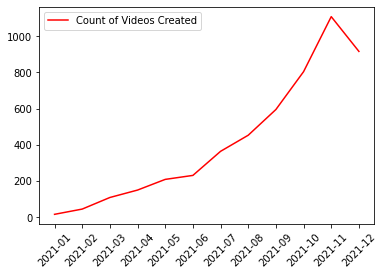

In [25]:
fig,ax = plt.subplots()
plt.plot(merged_group['date'], merged_group['Num Videos Created'], color = "red", label = "Count of Videos Created")
plt.xticks(rotation = 45)

leg = plt.legend(loc='best')
plt.show()

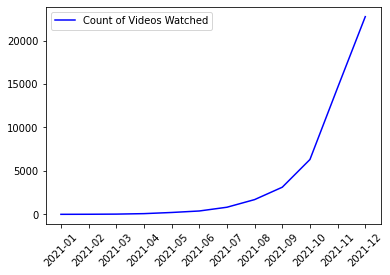

In [26]:
fig,ax = plt.subplots()
plt.plot(merged_group['date'], merged_group['Num Videos Watched'], color = "blue", label = 'Count of Videos Watched')
plt.xticks(rotation = 45)

leg = plt.legend(loc='best')
plt.show()


From both graphs above, we can see that the number of videos being created increase as time passed by, as well as the number of videos being watched. 

In [27]:
video_group = watched.groupby("videoId").mean()
video_group = video_group.rename(columns = {"duration": "Avg watching duration"}).reset_index()
video_group

,videoId,Avg watching duration
0,0000cf5d-6510-4c6e-bded-2817df2bfc92,2.305000
1,0008eb7a-4960-4194-aea7-43bbc7dd73e1,3.162857
2,00105f41-818d-4134-a150-db594e165ec8,2.020000
3,00157625-bad2-4bc0-91b7-7548db91b43a,5.549286
4,001aaf7d-99b7-436b-ac65-12880df6a1d6,2.406667
...,...,...
4995,ffb1ebf6-4ced-4919-85d8-b4f1c5918c0d,5.707500
4996,ffb9c375-631f-4522-aa2a-86d7ae646f2e,2.195000
4997,ffcb34f1-26d6-4d1e-9349-1f809cfe3999,1.596667
4998,ffe26a71-a89a-4aa7-8d9e-99a9a92041cb,3.924375


In [28]:
vid_analysis = video_group.merge(videos[['id', 'duration', 'num_shares']], left_on = "videoId", right_on = "id")
vid_analysis = vid_analysis.drop(columns = "id")
vid_analysis['duration diff'] = vid_analysis["duration"] - vid_analysis['Avg watching duration']
vid_analysis

,videoId,Avg watching duration,duration,num_shares,duration diff
0,0000cf5d-6510-4c6e-bded-2817df2bfc92,2.305000,3.27,1,0.965000
1,0008eb7a-4960-4194-aea7-43bbc7dd73e1,3.162857,5.30,9,2.137143
2,00105f41-818d-4134-a150-db594e165ec8,2.020000,2.86,11,0.840000
3,00157625-bad2-4bc0-91b7-7548db91b43a,5.549286,6.52,13,0.970714
4,001aaf7d-99b7-436b-ac65-12880df6a1d6,2.406667,5.64,9,3.233333
...,...,...,...,...,...
4995,ffb1ebf6-4ced-4919-85d8-b4f1c5918c0d,5.707500,6.54,4,0.832500
4996,ffb9c375-631f-4522-aa2a-86d7ae646f2e,2.195000,2.51,14,0.315000
4997,ffcb34f1-26d6-4d1e-9349-1f809cfe3999,1.596667,2.42,1,0.823333
4998,ffe26a71-a89a-4aa7-8d9e-99a9a92041cb,3.924375,4.77,3,0.845625


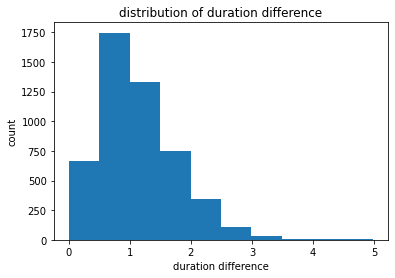

In [29]:
plt.hist(vid_analysis['duration diff'])
plt.xlabel("duration difference")
plt.ylabel("count")
plt.title("distribution of duration difference")
plt.show()

Most of the watchers stopped watching the video around one minute before the video actually ended. 

In [30]:
vid_analysis["duration diff"] = pd.cut(vid_analysis['duration diff'], bins = [0,1,2,3,4,5])
#plt.plot(videos_dur_shares['duration'], videos_dur_shares['num_shares'])
vid_analysis

,videoId,Avg watching duration,duration,num_shares,duration diff
0,0000cf5d-6510-4c6e-bded-2817df2bfc92,2.305000,3.27,1,"(0, 1]"
1,0008eb7a-4960-4194-aea7-43bbc7dd73e1,3.162857,5.30,9,"(2, 3]"
2,00105f41-818d-4134-a150-db594e165ec8,2.020000,2.86,11,"(0, 1]"
3,00157625-bad2-4bc0-91b7-7548db91b43a,5.549286,6.52,13,"(0, 1]"
4,001aaf7d-99b7-436b-ac65-12880df6a1d6,2.406667,5.64,9,"(3, 4]"
...,...,...,...,...,...
4995,ffb1ebf6-4ced-4919-85d8-b4f1c5918c0d,5.707500,6.54,4,"(0, 1]"
4996,ffb9c375-631f-4522-aa2a-86d7ae646f2e,2.195000,2.51,14,"(0, 1]"
4997,ffcb34f1-26d6-4d1e-9349-1f809cfe3999,1.596667,2.42,1,"(0, 1]"
4998,ffe26a71-a89a-4aa7-8d9e-99a9a92041cb,3.924375,4.77,3,"(0, 1]"


In [31]:
vid_duration = vid_analysis.groupby('duration diff').sum()[['num_shares']]
vid_duration

,num_shares
duration diff,
"(0, 1]",23522
"(1, 2]",20519
"(2, 3]",4599
"(3, 4]",386
"(4, 5]",43


Most of the watchers stopped watching video between 0-2 minutes before the video actually ended. This is a good number which means the video has a good enough quality content. 